In [1]:
import sys
sys.path.append('../scripts')
import pandas as pd
import numpy as np
from data_loader import DataLoader
from eda_analysis import EDAAnalysis
from IPython.display import Image

In [2]:
file_path = '../data/raw/MachineLearningRating_v3.txt'
loader = DataLoader(file_path)
try:
    data = loader.load_data()
    print("First 5 rows of raw data:")
    print(data.head())
    print("\nRaw data info:")
    print(data.info())
except Exception as e:
    print(f"Error loading data: {e}")
    # Fallback: Synthetic dataset for testing
    data = pd.DataFrame({
        'policyid': range(1000),
        'totalpremium': np.random.normal(1000, 200, 1000),
        'totalclaims': np.random.normal(500, 150, 1000),
        'province': np.random.choice(['Gauteng', 'Western Cape', 'KwaZulu-Natal'], 1000),
        'vehicletype': np.random.choice(['Sedan', 'SUV', 'Hatchback'], 1000),
        'transactionmonth': pd.date_range(start='2014-02-01', end='2015-08-01', freq='D')[:1000],
        'gender': np.random.choice(['Male', 'Female'], 1000),
        'customvalueestimate': np.random.normal(50000, 10000, 1000)
    })
    loader.data = data
    print("Using synthetic dataset for testing")

Detected delimiter: '|'
Data loaded successfully from ../data/raw/MachineLearningRating_v3.txt
Initial shape: (1000098, 52)
First 5 rows of raw data:
   underwrittencoverid  policyid     transactionmonth  isvatregistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  citizenship          legaltype title language                 bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  Engli

In [5]:
test = data['title'] = 'Dr'
print(type(test))

<class 'str'>


In [3]:
data = loader.clean_data()
print("\nFirst 5 rows of cleaned data:")
print(data.head())
print("\nCleaned data info:")
print(data.info())
print("\nData types:")
print(loader.check_data_types())

Removed 0 duplicate rows
Mapped 'termfrequency' to numeric values.
Dropped 810 rows with title 'Dr' and missing gender.
Imputed gender for 0 rows based on title.
Dropped 152647 rows with missing 'NewVehicle'
Dropped 8808 rows with missing values in critical vehicle-related columns.
Dropped 6 sparse columns: ['customvalueestimate', 'writtenoff', 'rebuilt', 'converted', 'crossborder', 'numberofvehiclesinfleet']
Filled missing 'bank' with 'Unknown'.
Filled missing 'accounttype' with mode: Current account
Filled missing 'capitaloutstanding' with 0.
Rows with totalpremium = 0 before imputation: 285615
Rows filled with totalpremium (Monthly): 285589
Rows filled with totalpremium (Annual): 26
Total rows filled: 285615
Remaining totalpremium = 0 rows: 5

Diagnosing remaining rows (first 5):
        policyid transactionmonth termfrequency  calculatedpremiumperterm  \
293519      5790       2015-06-01       Monthly                       0.0   
645277      7303       2015-07-01       Monthly     

/home/smuca/task/InsuranceRiskML/notebooks/../scripts/data_loader.py:120: DtypeWarning: Columns (11,31) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_data = pd.read_csv(save_path)


Data shape after reloading: (837833, 47)

First 5 rows of cleaned data:
   underwrittencoverid  policyid transactionmonth  isvatregistered  \
0               145249     12827       2015-03-01             True   
1               145249     12827       2015-05-01             True   
2               145249     12827       2015-07-01             True   
3               145255     12827       2015-05-01             True   
4               145255     12827       2015-07-01             True   

  citizenship          legaltype title language                 bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       accounttype  ... covercategory   covertype            covergroup  \

In [4]:
eda = EDAAnalysis(data)

In [5]:
print("\nDescriptive Statistics:")
print(eda.summarize_data())


Descriptive Statistics:
        totalpremium    totalclaims      cylinders  cubiccapacity  \
count  837833.000000  837833.000000  837833.000000  837833.000000   
mean      106.322402      68.422884       4.044023    2482.982968   
std       203.406381    2485.076889       0.262000     397.096604   
min      -284.497807  -12002.412281       0.000000       0.000000   
25%         2.900526       0.000000       4.000000    2237.000000   
50%         8.051491       0.000000       4.000000    2694.000000   
75%        85.000000       0.000000       4.000000    2694.000000   
max      3051.821100  393092.105263      10.000000   12880.000000   

           kilowatts  numberofdoors    suminsured  calculatedpremiumperterm  
count  837833.000000  837833.000000  8.378330e+05             837833.000000  
mean       96.915046       4.018753  6.000904e+05                118.430415  
std        18.854554       0.445123  1.502077e+06                224.013995  
min         0.000000       0.000000  1.00

In [6]:
print("\nOverall Loss Ratio:", eda.calculate_loss_ratio())
print("\nLoss Ratio by Province:")
print(eda.calculate_loss_ratio(group_by='province'))
print("\nLoss Ratio by Vehicle Type:")
print(eda.calculate_loss_ratio(group_by='vehicletype'))
print("\nLoss Ratio by Gender:")
print(eda.calculate_loss_ratio(group_by='gender'))


Overall Loss Ratio: 0.23130223590680324

Loss Ratio by Province:
province
Eastern Cape     0.159064
Free State       0.165819
Gauteng          0.281574
KwaZulu-Natal    0.192430
Limpopo          0.268325
Mpumalanga       0.238770
North West       0.191524
Northern Cape    0.116388
Western Cape     0.204519
Name: lossratio, dtype: float64

Loss Ratio by Vehicle Type:
vehicletype
Bus                  0.938010
Heavy Commercial     0.571234
Light Commercial     0.437919
Medium Commercial    0.342649
Passenger Vehicle    0.221447
Name: lossratio, dtype: float64

Loss Ratio by Gender:
gender
Female    0.295891
Male      0.232738
Name: lossratio, dtype: float64


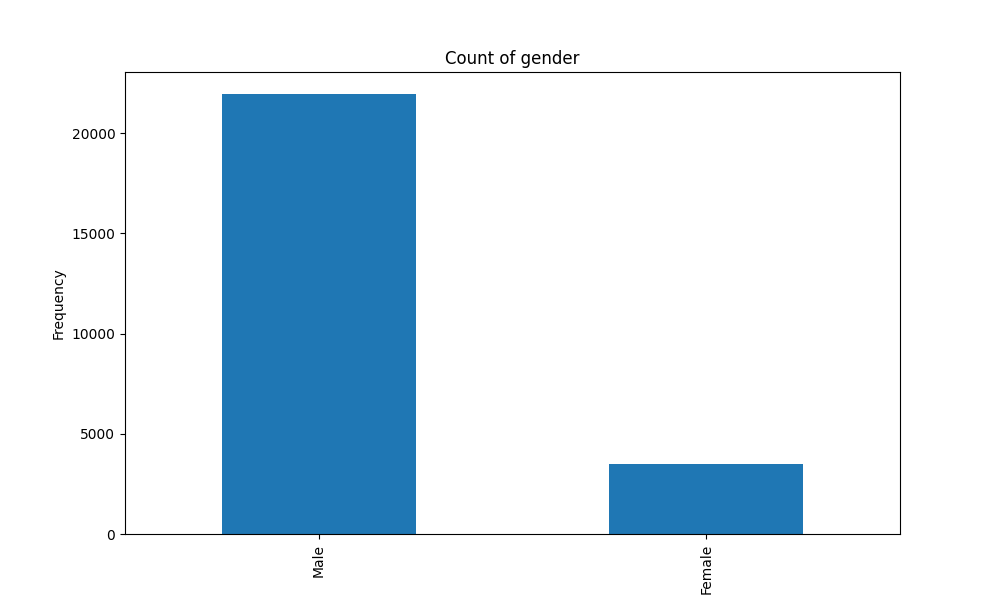

In [7]:
eda.univariate_analysis('totalpremium', plot_type='histogram')
eda.univariate_analysis('totalclaims', plot_type='histogram')
eda.univariate_analysis('province', plot_type='bar')
eda.univariate_analysis('vehicletype', plot_type='bar')
eda.univariate_analysis('gender', plot_type='bar')
Image(filename='plots/univariate_totalpremium.png')
Image(filename='plots/univariate_totalclaims.png')
Image(filename='plots/univariate_province.png')
Image(filename='plots/univariate_vehicletype.png')
Image(filename='plots/univariate_gender.png')

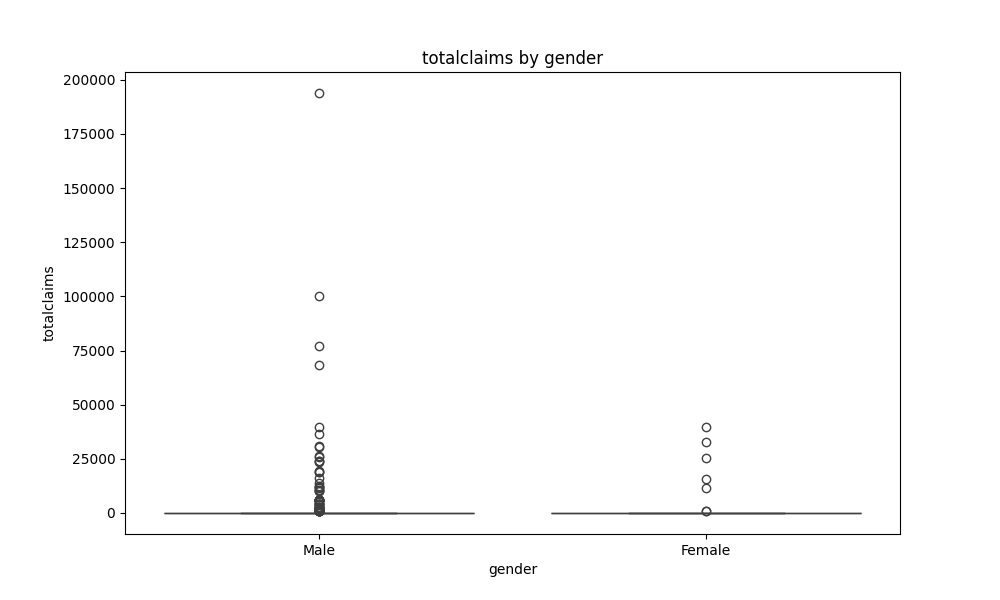

In [8]:
eda.bivariate_analysis('totalpremium', 'totalclaims', plot_type='scatter')
eda.bivariate_analysis('province', 'totalclaims', plot_type='box')
eda.bivariate_analysis('vehicletype', 'totalclaims', plot_type='box')
eda.bivariate_analysis('gender', 'totalclaims', plot_type='box')
Image(filename='plots/bivariate_totalpremium_totalclaims.png')
Image(filename='plots/bivariate_province_totalclaims.png')
Image(filename='plots/bivariate_vehicletype_totalclaims.png')
Image(filename='plots/bivariate_gender_totalclaims.png')

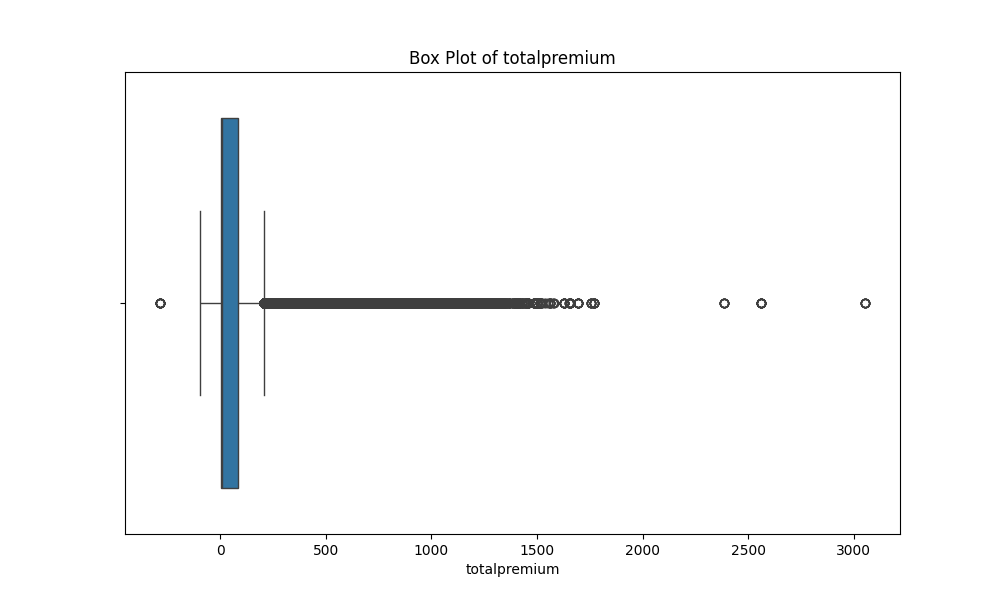

In [10]:
eda.detect_outliers('totalclaims')
eda.detect_outliers('totalpremium')

Image(filename='plots/outliers_totalclaims.png')
Image(filename='plots/outliers_totalpremium.png')



Correlation Matrix:
                          totalpremium  totalclaims  cylinders  cubiccapacity  \
totalpremium                  1.000000     0.068942   0.011863       0.029463   
totalclaims                   0.068942     1.000000   0.000408       0.001092   
cylinders                     0.011863     0.000408   1.000000       0.243598   
cubiccapacity                 0.029463     0.001092   0.243598       1.000000   
kilowatts                     0.036576     0.002837   0.262153       0.585834   
suminsured                   -0.112644    -0.006980   0.002085      -0.004676   
calculatedpremiumperterm      0.986150     0.072226   0.011995       0.030775   

                          kilowatts  suminsured  calculatedpremiumperterm  
totalpremium               0.036576   -0.112644                  0.986150  
totalclaims                0.002837   -0.006980                  0.072226  
cylinders                  0.262153    0.002085                  0.011995  
cubiccapacity             

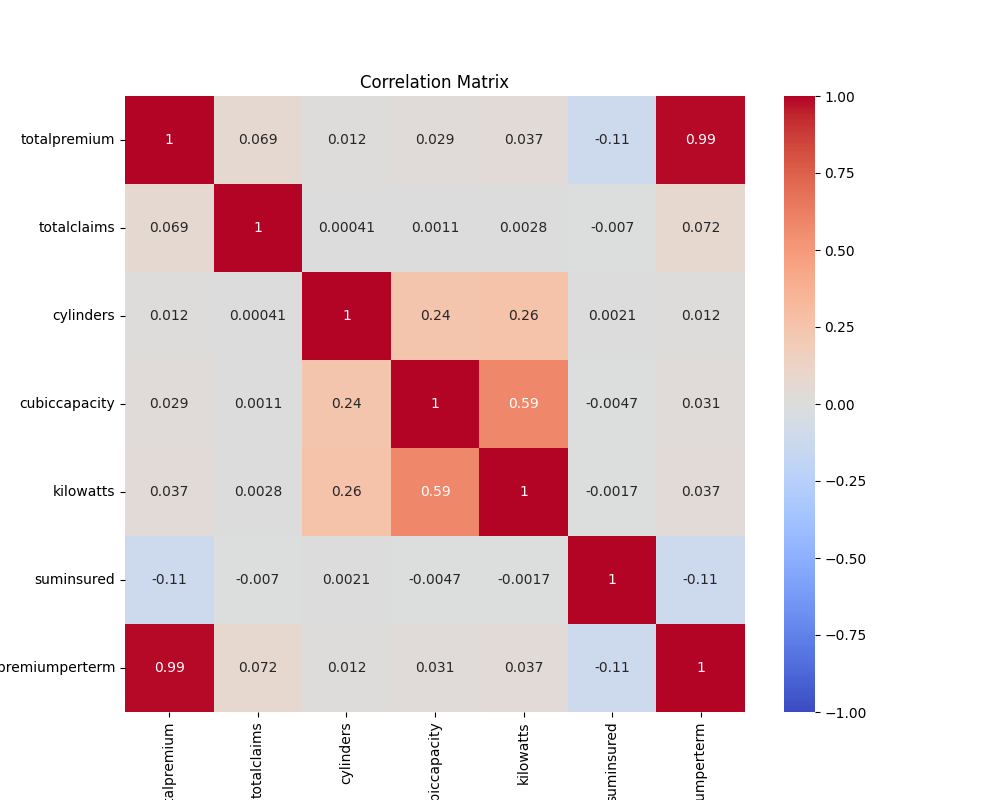

In [11]:
numerical_cols = ['totalpremium', 'totalclaims', 'cylinders',
                 'cubiccapacity', 'kilowatts', 'suminsured', 'calculatedpremiumperterm']
numerical_cols = [col for col in numerical_cols if col in data.columns]
print("\nCorrelation Matrix:")
print(eda.correlation_matrix(numerical_cols))
Image(filename='plots/correlation_matrix.png')

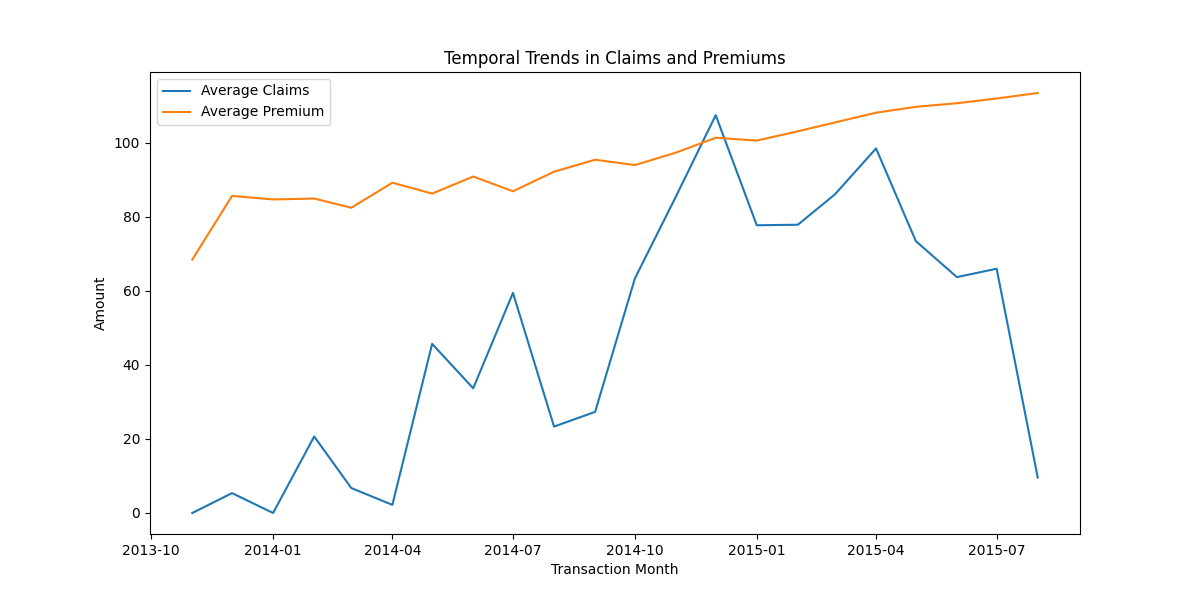

In [12]:
eda.plot_loss_ratio_by_province()
eda.plot_claims_by_vehicle_type()
eda.plot_temporal_trends()
Image(filename='plots/loss_ratio_province.png')
Image(filename='plots/claims_vehicletype.png')
Image(filename='plots/temporal_trends.png')